In [2]:
from energy_vad import read_wav
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf


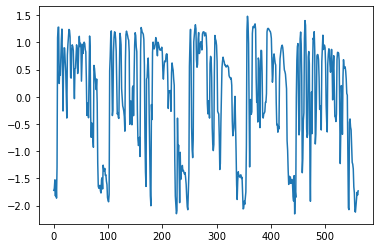

No handles with labels found to put in legend.


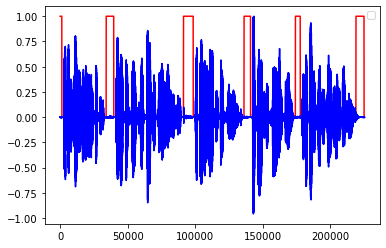

In [19]:
test_file="/data/LibriSpeech/train-960/100/122655/100-122655-0005.flac"

def test_nrg_vad(test_file, percent_high_nrg=0.0):
    fs,s = read_wav(test_file)
    win_len = int(fs*0.025)
    hop_len = int(fs*0.025)
    sframes = enframe(s,win_len,hop_len)

    percent_high_nrg = 0.0

    vad = 1 - nrg_vad(sframes,percent_high_nrg)

    plot_these(deframe(vad,win_len,hop_len),s)

In [23]:
from glob import glob
import os
from tqdm import tqdm
import random

In [24]:
tracklist = glob('/data/LibriSpeech/train-960/*/*/*.flac')
len(tracklist)
tracklist = random.choices(tracklist, k=100000)


In [25]:
def reconstruct_signal(signal, vad, hop_len):
    reconstructed_signal = []
    for i in range(len(vad)):
        reconstructed_signal.append(signal[i*hop_len:(i+1)*hop_len] * vad[i])

    x = np.concatenate(reconstructed_signal)
    x = x[x != 0]

    return x
    
def create_noise_samples(tracklist, total_duration=7819):
    sum_durations = 0
    for t in tqdm(tracklist):
        signal, vad = get_non_speech(t)
        noise_signal = reconstruct_signal(signal, vad, hop_len=int(16000*0.025))
        duration = len(noise_signal)/16000
        if 1.0 < duration < 3.0:
            sf.write('/data/Noise_LibriSpeech/noise_{}.wav'.format(os.path.basename(t.replace('.flac', ''))), noise_signal, samplerate=16000)
            sum_durations += duration
        
        if sum_durations > total_duration:
            break

  6%|▌         | 5674/100000 [05:41<1:34:37, 16.62it/s]  

7819.575000000003
